# Brownian motion - without drift 
*07-Oct-21* 


## A. Diffusion equation

The solution of the following diffusion equation
<br>

\begin{align}
  \frac{\partial}{\partial t}P(x,t)=\mathcal{D}\frac{\partial^2}{\partial x^2}P(x,t),
  \end{align}

<br>

in the infinite domain $x\in(-\infty,\infty)$, for initial condition $P(x,t=0)=\delta(x-x_0)$ and zero boundary conditions at infinity $P(x=\pm\infty,t)=0$, where $P(x,t)$ is the probability density function (PDF) and $\mathcal{D}$ is diffusion coefficient, is given by the Gaussian probability density function

\begin{align}
    P(x,t)=\frac{1}{\sqrt{4\pi\mathcal{D}t}}e^{-\frac{(x-x_0)^2}{4\mathcal{D}t}}.
\end{align}

This diffusion equation describes Brownian motion. The Brownian motion can also be modeled by the Langevin equation
<br>


\begin{align}
    \dot{x}(t)=\sqrt{2\mathcal{D}}\,\xi(t),
\end{align}

<br>

where $\xi(t)$ is white Gaussian noise with zero mean $\langle x(t)\rangle=0$ and correlation $\langle\xi(t)\xi(t')\rangle=\delta(t-t')$. 






## B. Simulations
> **Task1.** Simulations explained: 
- Simulate the Brownian motion by numerical solution of the Langevin equation.
- Plot the trajectory and the PDF.


<br>

The numerical solution is done by numerical integration of the Langevin equation, i.e.,

<br>


\begin{align}
    x(t+\Delta t)=x(t)+\sqrt{2\mathcal{D}\Delta t}\,\zeta(t),
\end{align}

<br>

where $\zeta(t)$ is a zero-mean Gaussian random variable $\sim N(0, \Delta t)$.

Mean squared displacement is calculated using
<br>


\begin{align}
    \langle x^2(t)\rangle=\int_{-\infty}^{\infty}x^2 P(x,t)\,dx=\int_{-\infty}^{\infty}x^2 \frac{1}{\sqrt{4\pi\mathcal{D}t}}e^{-\frac{(x-x_0)^2}{4\mathcal{D}t}}\,dx=x_0^2+2\mathcal{D}t.
\end{align}

Main class for stohastic process: 

In [69]:
# @author: Kiril Zelenkovski

# Python imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import warnings
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
warnings.filterwarnings("ignore")

# Specifying the figure parameters
font = {'family': 'serif',
        'color': 'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 10,
          'legend.handlelength': 2.}
plt.rcParams.update(params)


# Class for BM stochastic process
class Brownian_motion_Langevin:

    def solve(self):
        """
        Generates all step based the definition for BM, using 2 different approaches.  

        Both draw from a Normal Distribution ~ N(0, dt); If dt=1, it is N(0, 1) 

        B = B0 + B1*dB1 + ... Bn*dBn = x + v*dt + (2*Dc*dt)^1/2 * N(0, dt)
        :return: None
        """
        # Langevin eq. x(t + 1) = x(t) + v*dt + (2*Dc*dt)^0.5 * normal
        
        # 1st way - cumulative sum of all noises        
        dB = self.initial_y + self.drift * self.delta_t + self.sqrt_2D * self.sqrt_dt * np.random.normal(size=(len(self.times)))
        r1 = np.cumsum(dB)  

        # 2nd way - step by step addition
        r2 = np.zeros((len(self.times)))
        for t in range(len(self.times)-1):
            r2[t+1] = r2[t] + self.drift*self.delta_t + self.sqrt_2D * self.sqrt_dt *np.random.normal()

        # Append solutions
        self.numerical_solution = r1
        self.solution = r2
        
    def __init__(self, drift, diffusion_coefficient, initial_y, simulation_time, sampling_points):
        """

        :param drift: External force - drift
        :param diffusion_coefficient:
        :param initial_y: 1
        :param delta_t: dt - change in time - size of each interval
        :param simulation_time: total time for simulation
        """
        # Initial parameters 
        self.drift = drift
        self.diffusion_coefficient = diffusion_coefficient
        self.initial_y = initial_y

        # Define time 
        self.simulation_time = simulation_time
        self.sampling_points = sampling_points

        # Get dt
        self.times = np.arange(0,simulation_time+1,1)
        self.delta_t = self.times[1] - self.times[0]

        # Speed up calculations
        self.sqrt_dt = self.delta_t**0.5
        self.sqrt_2D = (2*self.diffusion_coefficient)**0.5

        # Simulate the diffusion process
        self.numerical_solution = []
        self.solution = []
        self.solve()

Define start parameters and run/plot *ensemble* with $10^4$ processes: 
- $n = 10^4$ - Number of simulations
- $V = 0$  - Drift for the diffusion process, v - external force (drift)
- $D = 1$ - Dc - diffusion coefficient
- $dt=1$ - interval size or size step
- $y0 = 0$  - starting point on y axis (theoretical 0 for BM)
- $tt = 10^4$  - total time for each simulation

In [70]:
# Define parametrs for BM process
n = 10_000 # Number of simulations 
V = 0  # Drift for the diffusion process, v - external force (drift)
Dc = 1  # Dc - diffusion coefficient
interval_size = 1 # dt = interval_size
y0 = 0  # y0 - starting point
tt = 10_000  # tt - total time for each simulation

# Run simulations
motions = []
for i in range(0, n):
    motions.append(Brownian_motion_Langevin(drift=V,
                                            diffusion_coefficient=Dc,
                                            initial_y=y0,
                                            simulation_time=tt,
                                            sampling_points=interval_size))

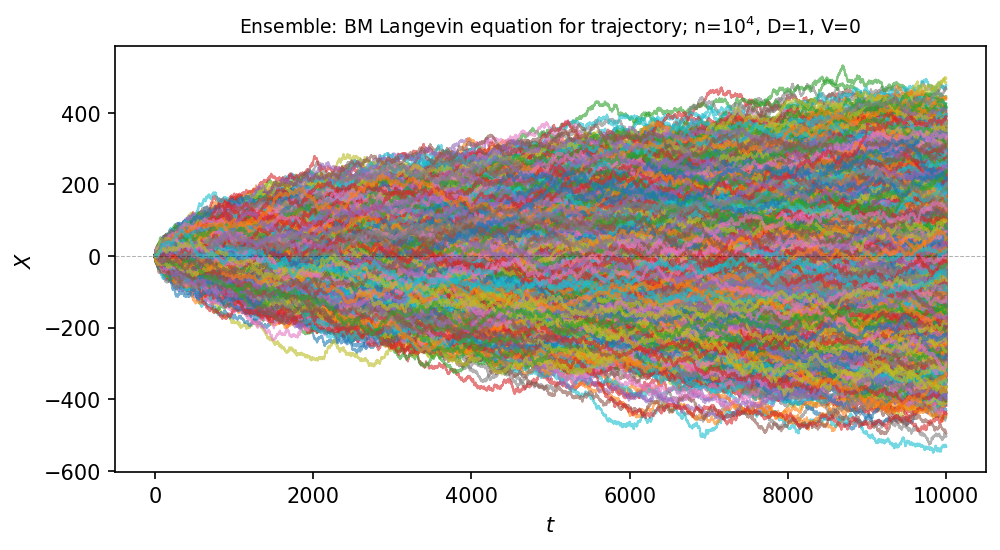

In [71]:
# Plot results from Ensemble 
figure, (ax) = plt.subplots(1, 1, figsize=(7, 4), dpi=150)

# Define lists for each solution
dist = []
dist2 = []

for i in range(0, n):
    x = motions[i].times # x- axis (time)
    y1 = motions[i].numerical_solution # Simulation type 1
    y3 = motions[i].solution # Simulation type 2
    ax.plot(x, y3, linewidth=1., alpha=0.6, label="BM-drift")
    dist.append(motions[i].numerical_solution)
    dist2.append(motions[i].solution)

# Add x-axis    
plt.axhline(y=0, linewidth=0.5, alpha=0.3, color="black", linestyle='--')

# Add drift function;  if V = 0, no need for plotting it (overlaped with x-axis)
if V != 0:
    plt.plot(x, V*x, linewidth=1., alpha=1., color="yellow", linestyle='-.')

plt.ylabel(r"$X$")
plt.xlabel(r"$t$")
plt.title(
    r"Ensemble: BM Langevin equation for trajectory; n=$10^4$, D={}, V={}".format(Dc, V),
    fontsize=9)
plt.tight_layout(pad=1.9)
# plt.savefig("Ensemble-beta.png")
plt.show()

In [72]:
# Check shape of lists
print(np.shape(dist2))
print(np.shape(dist))

(10000, 10001)
(10000, 10001)


### B.1. Second moment, $\langle x^2(t)\rangle$

Mean squared displacement is given by
<br>


\begin{align}
    \langle x^2(t)\rangle=\int_{-\infty}^{\infty}x^2 P(x,t)\,dx=\int_{-\infty}^{\infty}x^2 \frac{1}{\sqrt{4\pi\mathcal{D}t}}e^{-\frac{(x-x_0)^2}{4\mathcal{D}t}}\,dx=x_0^2+2\mathcal{D}t.
\end{align}

In [74]:
# Calculations
times = np.arange(0,tt+1,interval_size)
delta_t = times[1] - times[0]
t_frame = times[1]
t = [1, 2, 10]
print("Step size is dt = ", delta_t)

no_simulations, no_points = np.shape(dist)
scale = (no_points/tt)**(1/2)
print("Scale in case of smaler dt, scale={x:.2f}".format(x=scale))

msd = []
msd2 = []

for t in range(no_points-1):
  value_x = [dist[i][t] for i in range(n)] 
  value = np.dot(value_x, value_x) / n    # dot product / ensemble size
  msd.append(value)

for t in range(no_points-1):
  value_x = [dist2[i][t] for i in range(n)] 
  value = np.dot(value_x, value_x) / n    # dot product / ensemble size
  msd2.append(value)

Step size is dt =  1
Scale in case of smaler dt, scale=1.00


#### Results

Plot the theoretical (orange) vs the simulation moment (blue-type1, red-type2)

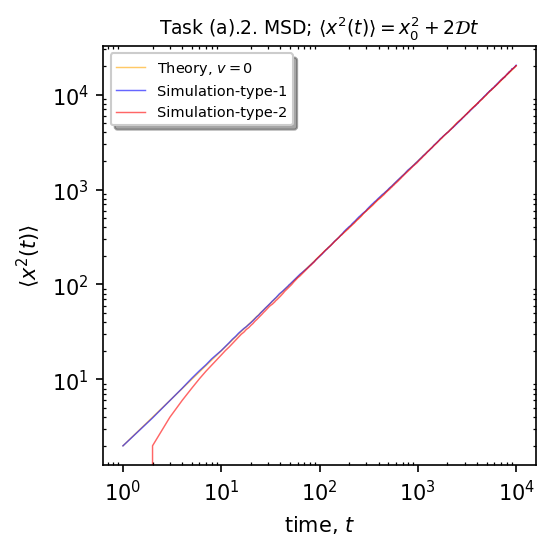

In [84]:
# Theoretical vs. Ensemble
figure, (ax) = plt.subplots(1, 1, figsize=(4, 4), dpi=150)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

x = np.arange(1, tt+1)
time_t = dt = delta_t
x0 = 0   # mean from PDF

ax.plot(x, (lambda x: (x0 + V*x)**2 + 2*Dc*x**1)(x), linewidth=0.7, alpha=0.6, label=r"Theory, $v=${}".format(V), color="orange")
ax.plot(x, msd, 'blue',  markersize=1, linewidth=0.7, alpha=0.6, label=r"Simulation-type-1", markevery=30)
ax.plot(x, msd2, 'red',  markersize=1, linewidth=0.7, alpha=0.6, label=r"Simulation-type-2", markevery=30)


# Add legend if comparing values
plt.legend(loc='upper left',
           fancybox=True,
           shadow=True,
           fontsize='x-small')

ax.set_yscale('log')
ax.set_xscale('log')

plt.ylabel(r"$\langle x^2(t) \rangle$")
plt.xlabel(r"time, $t$")
plt.title(r"Task (a).2. MSD; $\langle x^2(t)\rangle=x_0^2+2\mathcal{D}t$", fontsize=9)
plt.tight_layout(pad=1.9)
ax.tick_params(direction="in", which='minor', length=1.5, top=True, right=True)
plt.savefig("")
plt.show()

### B.2. PDF, $P(x,t)$

$P(x,t)$ is the probability density function (PDF) and $\mathcal{D}$ is diffusion coefficient, is given by the Gaussian probability density function


\begin{align}
    P(x,t)=\frac{1}{\sqrt{4\pi\mathcal{D}t}}e^{-\frac{(x-x_0)^2}{4\mathcal{D}t}}.
\end{align}


We calculate the distributions for 3 different times ($t=[1, 2, 10]$) and plot their distribution vs. the theoretical for the exact times

In [76]:
t = [1, 2, 10]

$t=1$

(10000,)
Mean:  -0.001669172322323002
STD:   1.4132938226483744


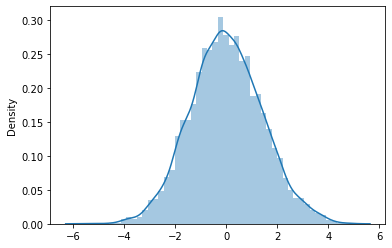

In [77]:
# t=1, n=10^4 samples
x_mean_1 = [motions[i].numerical_solution[0] for i in range(0, no_simulations)]

# Print check
print(np.shape(x_mean_1))

mu_1 = np.mean(x_mean_1)

# Print mean, std
print("Mean: ",np.mean(x_mean_1))
print("STD:  ",np.std(x_mean_1))

# Plot dist
x_dots_1 = sns.distplot((scale*np.array(x_mean_1) - mu_1 - y0) + V*t[0]).get_lines()[0].get_data()

$t=2$

(10000,)
Mean:  -0.01599862222285777
STD:   1.9825865412445143


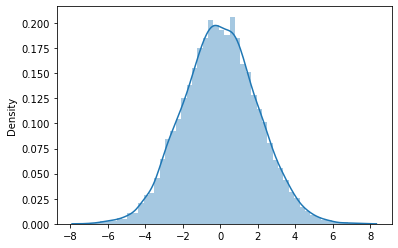

In [78]:
# t=2, n=10^4
x_mean_2 = [motions[i].numerical_solution[1] for i in range(0, no_simulations)]

# Print check
print(np.shape(x_mean_2))

mu_2 = np.mean(x_mean_2)

# Print mean, std
print("Mean: ",np.mean(x_mean_2))
print("STD:  ",np.std(x_mean_2))

# Plot dist
x_dots_2 = sns.distplot(scale * np.array(x_mean_2 - mu_2 - y0) + V*t[1]).get_lines()[0].get_data()

$t=10$

(10000,)
Mean:  0.003390582383869105
STD:   4.488405150183261


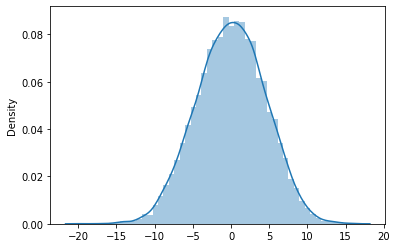

In [79]:
# t=3, n=10^4
x_mean_3 = [motions[i].numerical_solution[9] for i in range(0, no_simulations)]
# Print check
print(np.shape(x_mean_3))

mu_3 = np.mean(x_mean_3)

# Print mean, std
print("Mean: ",np.mean(x_mean_3))
print("STD:  ",np.std(x_mean_3))

# Plot dist
x_dots_3 = sns.distplot(scale * np.array(x_mean_3 - mu_3 - y0)+V*t[2]).get_lines()[0].get_data()

#### Results 

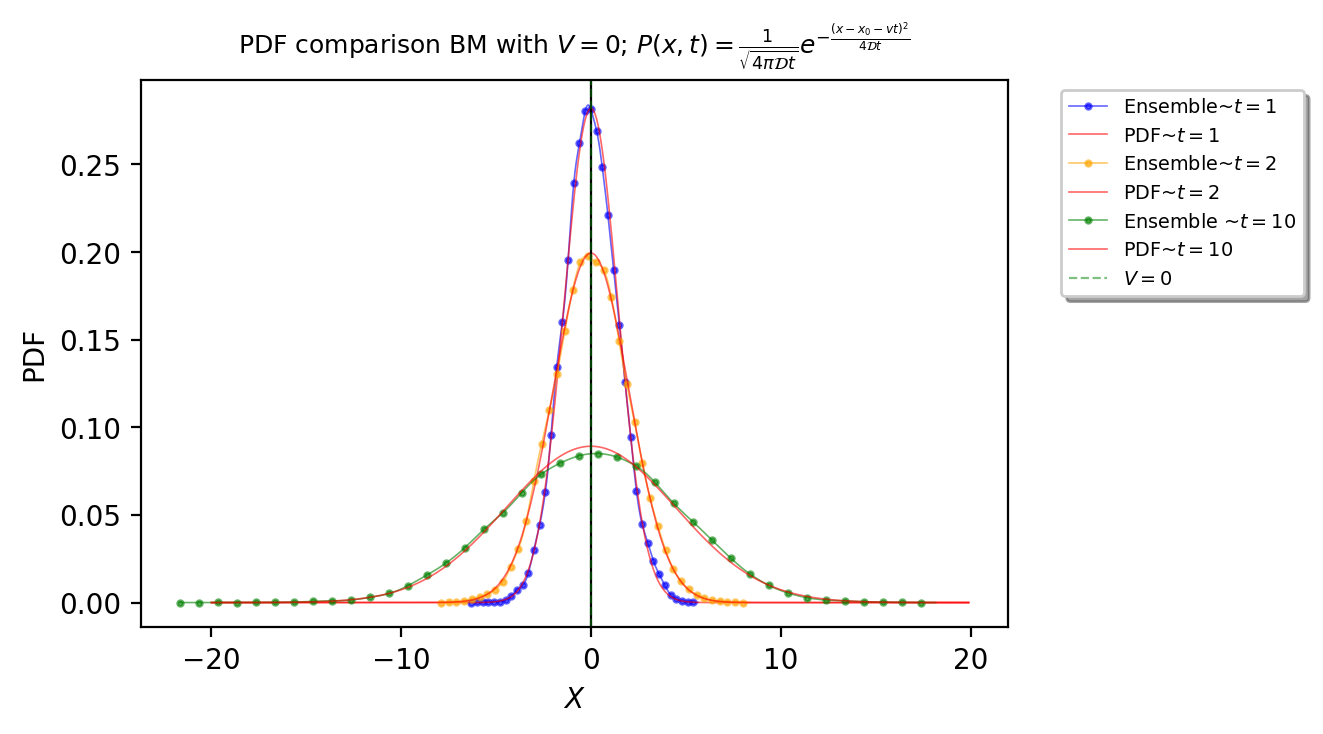

In [80]:
# Plot comparison results
from scipy import stats
import seaborn as sns

figure, (ax) = plt.subplots(1, 1, figsize=(7, 4), dpi=200)

x = np.arange(-20,20,0.1)

# Calculate PDF for t=1, t=2 $ t=10
x_0 = 0
t = [1, 2, 10]
f1 = 1/(np.sqrt(4*np.pi*Dc*t[0])) * np.exp(-np.square(x-x_0-V*t[0])/(4*Dc*t[0]))
f2 = 1/(np.sqrt(4*np.pi*Dc*t[1])) * np.exp(-np.square(x-x_0-V*t[1])/(4*Dc*t[1]))
f3 = 1/(np.sqrt(4*np.pi*Dc*t[2])) * np.exp(-np.square(x-x_0-V*t[2])/(4*Dc*t[2]))

# t=1
plt.plot(x_dots_1[0], x_dots_1[1], linewidth=0.6, alpha=0.6, label=r"Ensemble~$t={}$".format(t[0]), color="blue", marker='o',markevery=5, markersize=2)
plt.plot(x, f1, linewidth=0.6, alpha=0.6, label=r"PDF~$t={}$".format(t[0]), color="red")

# t=2
plt.plot(x_dots_2[0], x_dots_2[1], linewidth=0.6, alpha=0.6, label=r"Ensemble~$t={}$".format(t[1]), color="orange", marker='o',markevery=5, markersize=2)
plt.plot(x, f2, linewidth=0.6, alpha=0.6, label=r"PDF~$t={}$".format(t[1]), color="red")

# t=10
plt.plot(x_dots_3[0], x_dots_3[1], linewidth=0.6, alpha=0.6, label=r"Ensemble ~$t={}$".format(t[2]), color="green", marker='o',markevery=5, markersize=2)
plt.plot(x, f3, linewidth=0.6, alpha=0.6, label=r"PDF~$t={}$".format(t[2]), color="red")


# Plot lines for reference 
plt.axvline(x=0, linewidth=0.8, alpha=1, color="black")
plt.axvline(x=V, linewidth=0.8, alpha=0.5, color="green", linestyle='--', label=r'$V=${}'.format(V))


# Add legend if comparing values
plt.legend(bbox_to_anchor=(1.05, 1.0),
           loc='upper left',
           fancybox=True,
           shadow=True,
           fontsize='x-small')

plt.ylabel("PDF")
plt.xlabel(r"$X$")
plt.title(
    r"PDF comparison BM with $V={}$".format(V) + r"; $P(x,t)=\frac{1}{\sqrt{4\pi\mathcal{D}t}}e^{-\frac{(x-x_0-vt)^2}{4\mathcal{D}t}}$",
    fontsize=9, pad=10)
plt.tight_layout(pad=1.9)
ax.tick_params(direction="in", which='minor', length=1.5, top=True, right=True)
# plt.savefig("PDF-Ensemble-t_all-tt_10_v_-1.png")
plt.show()

In [82]:
# MSE for each time snapshot
print("t= 1, MSE = {x:.4f}".format(x=np.square(np.subtract(x_dots_1[1], f1[:200])).mean()))
print("t= 2, MSE = {x:.4f}".format(x=np.square(np.subtract(x_dots_2[1], f2[:200])).mean()))
print("t=10, MSE = {x:.4f}".format(x=np.square(np.subtract(x_dots_3[1], f3[:200])).mean()))

t= 1, MSE = 0.0212
t= 2, MSE = 0.0120
t=10, MSE = 0.0023
